In [1]:
import os
import pandas as pd
import numpy as np
import joblib

In [2]:
FEATURES_PATH = "Data/genre/genre_features.csv"

In [3]:
genre_df = pd.read_csv(FEATURES_PATH)
genre_df

,filepath,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,Data\genre\classical\3_Gymnop_dies__No_1_Lent_...,0.275989,0.087559,0.010583,0.000091,511.348575,9103.633704,689.078790,46138.561567,742.979730,...,61.172371,-4.606221,47.017910,-4.100603,57.852356,-1.839327,53.493599,-1.510198,45.281086,classical
1,Data\genre\classical\3_Pieces_for_cello_and_pi...,0.237563,0.087696,0.056926,0.002187,1241.776333,264172.830731,1513.863501,142229.080476,2219.192311,...,102.694992,-1.447847,97.213341,-3.208922,78.864685,-3.766309,79.929405,-2.250935,84.486473,classical
2,Data\genre\classical\Andante_festivo_for_Strin...,0.341058,0.096317,0.036828,0.000489,1668.857823,204849.385086,1860.620796,38415.393578,3212.257237,...,59.784138,-3.402595,48.124302,-0.071742,63.707729,-1.679239,72.742752,2.663173,94.037369,classical
3,Data\genre\classical\An_der_sch_nen_blauen_Don...,0.248209,0.085765,0.017813,0.000244,1252.732643,86190.363082,1449.547102,84887.944858,2294.383115,...,52.236919,-0.960255,61.101704,-0.193419,65.273537,-3.210993,90.715782,-2.882400,103.525459,classical
4,Data\genre\classical\Appalachian_Spring__VII__...,0.233974,0.083539,0.059431,0.002133,1341.107398,119502.786085,1352.241775,61364.486431,2303.976366,...,91.218193,-3.888613,106.444038,-0.653768,109.846786,-0.869724,125.582916,0.433451,234.376434,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Data\genre\rock\Won_t_Get_Fooled_Again_-_Origi...,0.373301,0.083664,0.232150,0.006892,1888.657915,306657.198985,1968.241673,361584.001799,3813.259223,...,30.968317,-6.950219,34.202747,0.122720,52.732254,-4.823411,46.354572,-5.357568,49.176487,rock
662,Data\genre\rock\You_Give_Love_A_Bad_Name.wav,0.428303,0.077946,0.231362,0.004614,3011.535284,280672.383913,2509.752278,78990.838386,5846.873249,...,34.058098,-5.301090,39.428707,1.973138,47.977577,-2.062659,58.185715,2.124467,47.723183,rock
663,Data\genre\rock\You_Really_Got_Me.wav,0.408563,0.085235,0.250809,0.006716,2706.681935,483941.245466,2637.547061,112771.727979,5838.496485,...,36.468834,-4.585155,29.405107,2.383985,31.779301,-4.882062,38.104828,-3.424580,34.257076,rock
664,Data\genre\rock\Zombie.wav,0.407819,0.083459,0.143461,0.002261,2385.096993,616793.101370,2492.814843,248210.467968,4988.648750,...,54.149693,-7.581491,57.943996,1.022768,65.740440,-0.968116,63.205631,0.415411,68.596748,rock


In [4]:
genre_labels = genre_df.iloc[:,-1]
genre_labels

0      classical
1      classical
2      classical
3      classical
4      classical
         ...    
661         rock
662         rock
663         rock
664         rock
665         rock
Name: label, Length: 666, dtype: object

In [5]:
genre_features = genre_df.iloc[:, 1:-1]
genre_features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.275989,0.087559,0.010583,0.000091,511.348575,9103.633704,689.078790,46138.561567,742.979730,4.366472e+04,...,-3.199315,61.172371,-4.606221,47.017910,-4.100603,57.852356,-1.839327,53.493599,-1.510198,45.281086
1,0.237563,0.087696,0.056926,0.002187,1241.776333,264172.830731,1513.863501,142229.080476,2219.192311,1.103004e+06,...,-1.378518,102.694992,-1.447847,97.213341,-3.208922,78.864685,-3.766309,79.929405,-2.250935,84.486473
2,0.341058,0.096317,0.036828,0.000489,1668.857823,204849.385086,1860.620796,38415.393578,3212.257237,1.025103e+06,...,0.364241,59.784138,-3.402595,48.124302,-0.071742,63.707729,-1.679239,72.742752,2.663173,94.037369
3,0.248209,0.085765,0.017813,0.000244,1252.732643,86190.363082,1449.547102,84887.944858,2294.383115,4.573316e+05,...,0.449957,52.236919,-0.960255,61.101704,-0.193419,65.273537,-3.210993,90.715782,-2.882400,103.525459
4,0.233974,0.083539,0.059431,0.002133,1341.107398,119502.786085,1352.241775,61364.486431,2303.976366,4.344404e+05,...,-3.056943,91.218193,-3.888613,106.444038,-0.653768,109.846786,-0.869724,125.582916,0.433451,234.376434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.373301,0.083664,0.232150,0.006892,1888.657915,306657.198985,1968.241673,361584.001799,3813.259223,1.813737e+06,...,0.363298,30.968317,-6.950219,34.202747,0.122720,52.732254,-4.823411,46.354572,-5.357568,49.176487
662,0.428303,0.077946,0.231362,0.004614,3011.535284,280672.383913,2509.752278,78990.838386,5846.873249,9.445311e+05,...,0.361728,34.058098,-5.301090,39.428707,1.973138,47.977577,-2.062659,58.185715,2.124467,47.723183
663,0.408563,0.085235,0.250809,0.006716,2706.681935,483941.245466,2637.547061,112771.727979,5838.496485,1.721284e+06,...,-3.992235,36.468834,-4.585155,29.405107,2.383985,31.779301,-4.882062,38.104828,-3.424580,34.257076
664,0.407819,0.083459,0.143461,0.002261,2385.096993,616793.101370,2492.814843,248210.467968,4988.648750,2.755425e+06,...,1.033217,54.149693,-7.581491,57.943996,1.022768,65.740440,-0.968116,63.205631,0.415411,68.596748


In [6]:
genre_fps = genre_df.iloc[:, 0]
genre_fps

0      Data\genre\classical\3_Gymnop_dies__No_1_Lent_...
1      Data\genre\classical\3_Pieces_for_cello_and_pi...
2      Data\genre\classical\Andante_festivo_for_Strin...
3      Data\genre\classical\An_der_sch_nen_blauen_Don...
4      Data\genre\classical\Appalachian_Spring__VII__...
                             ...                        
661    Data\genre\rock\Won_t_Get_Fooled_Again_-_Origi...
662         Data\genre\rock\You_Give_Love_A_Bad_Name.wav
663                Data\genre\rock\You_Really_Got_Me.wav
664                           Data\genre\rock\Zombie.wav
665    Data\genre\rock\_I_Can_t_Get_No__Satisfaction_...
Name: filepath, Length: 666, dtype: object

In [7]:
from sklearn.preprocessing import StandardScaler

genre_scaler = StandardScaler()
genre_features_scaled = genre_scaler.fit_transform(genre_features)
genre_features_scaled

joblib.dump(genre_scaler, 'Util/genre_scaler.joblib')

['Util/genre_scaler.joblib']

In [8]:
from sklearn.preprocessing import LabelEncoder

genre_convertor = LabelEncoder()
genre_labels = genre_convertor.fit_transform(genre_labels)
genre_labels = pd.DataFrame(data=genre_labels, columns=['label'])
genre_labels

joblib.dump(genre_convertor, 'Util/genre_convertor.joblib')

['Util/genre_convertor.joblib']

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(genre_features_scaled)
pcaDF = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])

pcaDF = pd.concat([pcaDF, genre_labels], axis=1)
pcaDF

,PCA 1,PCA 2,label
0,-7.478094,2.215754,0
1,-5.883048,3.705892,0
2,-4.096861,0.859707,0
3,-6.605788,2.608930,0
4,-4.418203,6.261997,0
...,...,...,...
661,-2.601970,-2.808670,6
662,-1.360699,-5.040089,6
663,-1.984128,-4.764633,6
664,-1.501456,-3.239575,6


['classical' 'country' 'edm' 'hiphop' 'jazz' 'reggae' 'rock']


Text(0, 0.5, 'Principal Component 2')

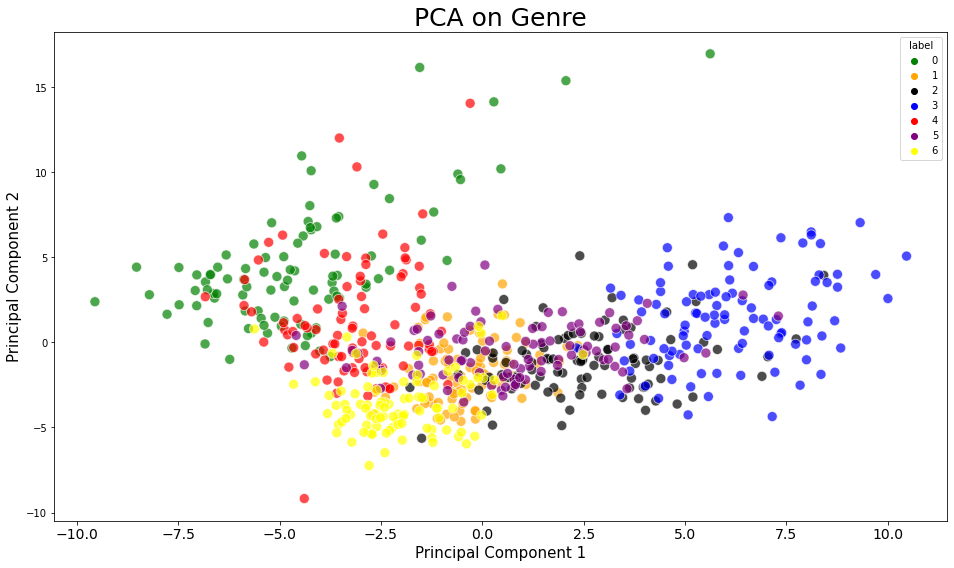

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PCA 1", y = "PCA 2", data = pcaDF, hue = "label", alpha = 0.7,
               s = 100, palette=["green", "orange", "black", "blue", "red", "purple", "yellow"]);

print(genre_convertor.classes_)
plt.title('PCA on Genre', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genre_features_scaled, genre_labels, test_size=0.3, random_state=0) # random state may not be wise

In [13]:
print(f"Size of dataset: {len(genre_features_scaled)}")
print(f"Size of training set: {len(X_train)}")
print(f"Size of test set: {len(X_test)}")

Size of dataset: 666
Size of training set: 466
Size of test set: 200


**K-NEAREST NEIGHBORS**





In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

max_neighbors = 50
knn_num_neighbors = []
knn_train_accs = []
knn_test_accs = []

for i in range(2, max_neighbors + 1): # from 2 neighbors to 20 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    
    train_pred = knn_model.predict(X_train)
    test_pred = knn_model.predict(X_test)
    
    knn_num_neighbors.append(i)
    knn_train_accs.append(metrics.accuracy_score(y_train, train_pred))
    knn_test_accs.append(metrics.accuracy_score(y_test, test_pred))
    

In [15]:
print(knn_num_neighbors)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [16]:
print(knn_train_accs)

[0.8347639484978541, 0.8433476394849786, 0.8175965665236051, 0.8218884120171673, 0.8090128755364807, 0.8283261802575107, 0.8261802575107297, 0.8068669527896996, 0.8154506437768241, 0.8133047210300429, 0.8111587982832618, 0.8133047210300429, 0.8090128755364807, 0.8133047210300429, 0.8047210300429185, 0.7982832618025751, 0.7939914163090128, 0.796137339055794, 0.8025751072961373, 0.7982832618025751, 0.796137339055794, 0.7896995708154506, 0.7918454935622318, 0.7854077253218884, 0.7854077253218884, 0.7703862660944206, 0.7703862660944206, 0.7725321888412017, 0.7660944206008584, 0.7660944206008584, 0.7618025751072961, 0.759656652360515, 0.7703862660944206, 0.759656652360515, 0.7618025751072961, 0.7532188841201717, 0.7467811158798283, 0.7446351931330472, 0.7510729613733905, 0.7510729613733905, 0.7532188841201717, 0.7532188841201717, 0.7381974248927039, 0.7446351931330472, 0.7424892703862661, 0.740343347639485, 0.7296137339055794, 0.7317596566523605, 0.7317596566523605]


In [17]:
print(knn_test_accs)

[0.75, 0.775, 0.76, 0.81, 0.795, 0.795, 0.8, 0.8, 0.805, 0.825, 0.805, 0.815, 0.81, 0.82, 0.79, 0.805, 0.795, 0.79, 0.78, 0.775, 0.775, 0.795, 0.785, 0.79, 0.78, 0.795, 0.795, 0.8, 0.795, 0.79, 0.785, 0.78, 0.775, 0.795, 0.785, 0.775, 0.775, 0.77, 0.77, 0.79, 0.775, 0.78, 0.785, 0.77, 0.785, 0.78, 0.78, 0.785, 0.78]


In [18]:
print(f"Best test accuracy is {np.max(knn_test_accs)} at num neighbors = {knn_num_neighbors[np.argmax(knn_test_accs)]}")

Best test accuracy is 0.825 at num neighbors = 11


In [19]:
print(f"Choosing num neighbors 11 with train accuracy of {knn_train_accs[9]} and test accuracy of {knn_test_accs[8]}")

Choosing num neighbors 11 with train accuracy of 0.8133047210300429 and test accuracy of 0.805


**SUPPORT VECTOR MACHINE (SVM)**

In [20]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_train_pred = svc.predict(X_train)
svc_test_pred = svc.predict(X_test)

print(f"SVC Train Acc: {metrics.accuracy_score(y_train, svc_train_pred)}")
print(f"SVC Test Acc: {metrics.accuracy_score(y_test, svc_test_pred)}")

joblib.dump(svc, "Models/svc_genre_classifier.joblib")

SVC Train Acc: 0.9527896995708155
SVC Test Acc: 0.86


C:\Users\18582\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Models/svc_genre_classifier.joblib']

**SVM METRICS**

In [21]:
import sklearn.metrics as metrics

svc_predictions = svc.predict(X_test)
print(f"SVC accuracy: {metrics.accuracy_score(y_test, svc_predictions)}")
print("----")
print(genre_convertor.classes_)
print(metrics.classification_report(y_test, svc_predictions))

SVC accuracy: 0.86
----
['classical' 'country' 'edm' 'hiphop' 'jazz' 'reggae' 'rock']
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.85      0.89      0.87        19
           2       0.88      0.64      0.74        33
           3       0.78      0.97      0.87        30
           4       1.00      0.86      0.93        29
           5       0.77      0.77      0.77        26
           6       0.88      0.91      0.89        32

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



<AxesSubplot:>

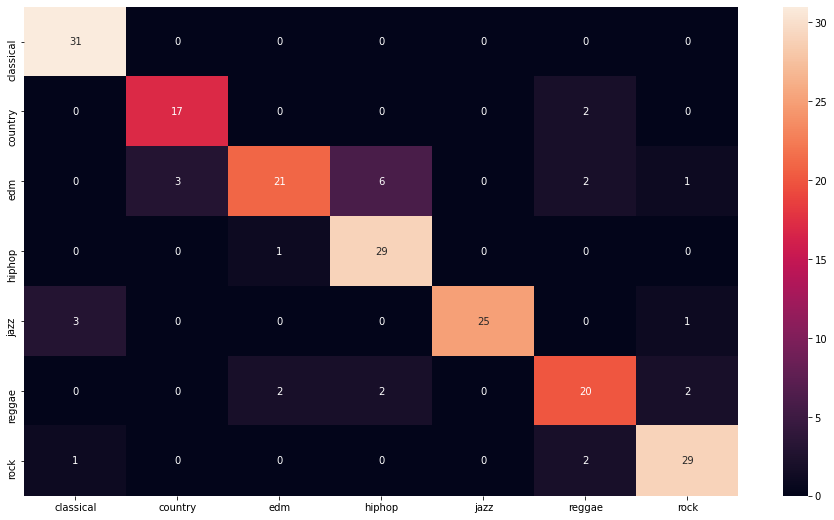

In [22]:
matrix = metrics.confusion_matrix(y_test, svc_predictions)
df_cm = pd.DataFrame(matrix, index = genre_convertor.classes_, columns = genre_convertor.classes_)
plt.figure(figsize = (16, 9))
sns.heatmap(df_cm, annot=True)

**NAIVE BAYES**

Could be advantageous since our dataset is quite small

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

print(f"Naive Bayes Train Acc: {metrics.accuracy_score(y_train, gnb_train_pred)}")
print(f"Naive Bayes Test Acc: {metrics.accuracy_score(y_test, gnb_test_pred)}")

Naive Bayes Train Acc: 0.8025751072961373
Naive Bayes Test Acc: 0.77


C:\Users\18582\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**NEURAL NETWORK**

In [24]:
import tensorflow as tf

num_epochs = 450
batch_size = 8

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation="softmax") 
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

Epoch 1/450
59/59 [==============================] - 0s 4ms/step - loss: 2.1672 - accuracy: 0.1567 - val_loss: 2.1324 - val_accuracy: 0.1750
Epoch 2/450
59/59 [==============================] - 0s 1ms/step - loss: 2.0854 - accuracy: 0.2060 - val_loss: 2.0439 - val_accuracy: 0.2000
Epoch 3/450
59/59 [==============================] - 0s 1ms/step - loss: 2.0364 - accuracy: 0.1974 - val_loss: 1.9647 - val_accuracy: 0.2150
Epoch 4/450
59/59 [==============================] - 0s 1ms/step - loss: 2.0015 - accuracy: 0.1996 - val_loss: 1.8878 - val_accuracy: 0.2600
Epoch 5/450
59/59 [==============================] - 0s 1ms/step - loss: 1.9006 - accuracy: 0.2639 - val_loss: 1.8218 - val_accuracy: 0.2800
Epoch 6/450
59/59 [==============================] - 0s 1ms/step - loss: 1.8629 - accuracy: 0.2403 - val_loss: 1.7636 - val_accuracy: 0.3100
Epoch 7/450
59/59 [==============================] - 0s 1ms/step - loss: 1.8164 - accuracy: 0.2682 - val_loss: 1.7111 - val_accuracy: 0.3700
Epoch 8/450
5

**NN STATISTICS**

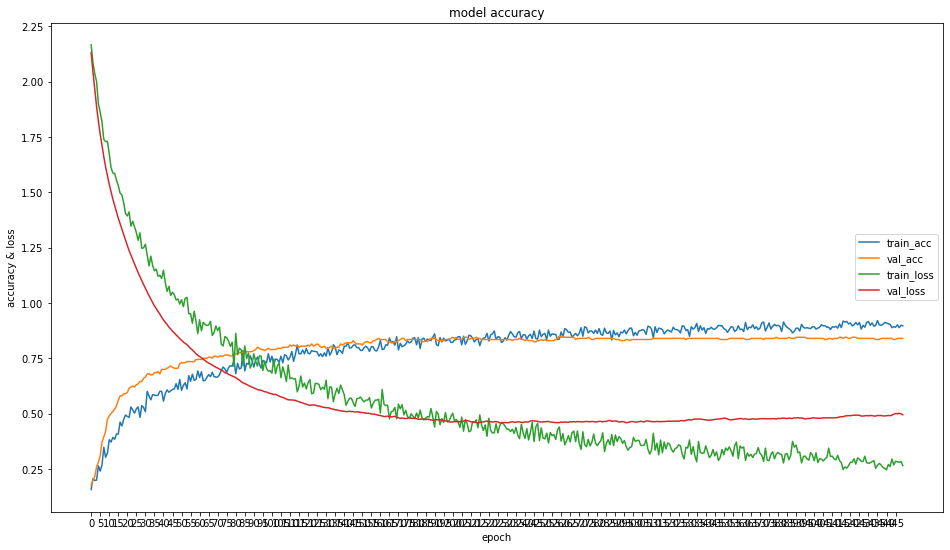

In [25]:
plt.figure(figsize = (16, 9))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy & loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, num_epochs, 5))
plt.legend(['train_acc', 'val_acc', 'train_loss', 'val_loss'], loc='center right')
plt.show()

In [26]:
nn_predictions = np.argmax(nn_model.predict(X_test), axis=1)
print(f"Neural network accuracy: {metrics.accuracy_score(y_test, nn_predictions)}")
print(f"Neural network loss: {history.history['val_loss'][-1]}")
print("----")
print(genre_convertor.classes_)
print(metrics.classification_report(y_test, nn_predictions))

Neural network accuracy: 0.84
Neural network loss: 0.49466606974601746
----
['classical' 'country' 'edm' 'hiphop' 'jazz' 'reggae' 'rock']
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.75      0.95      0.84        19
           2       0.74      0.61      0.67        33
           3       0.70      0.87      0.78        30
           4       0.93      0.93      0.93        29
           5       0.95      0.73      0.83        26
           6       0.88      0.94      0.91        32

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



<AxesSubplot:>

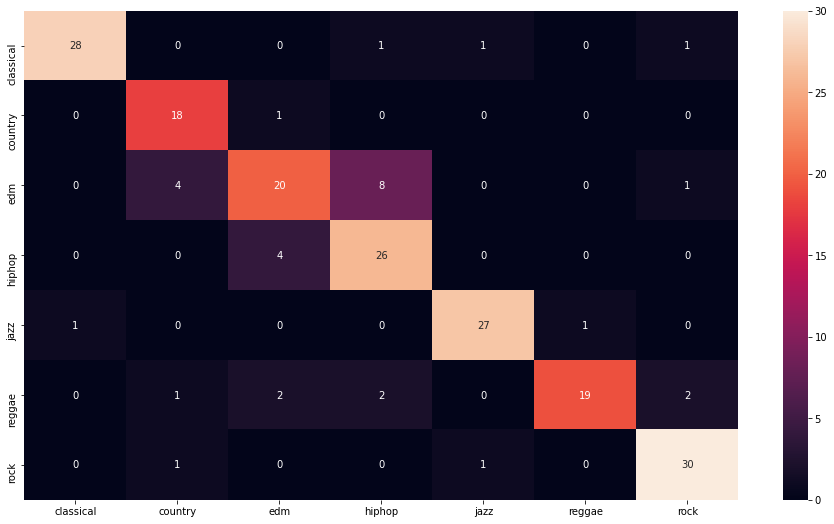

In [27]:
matrix = metrics.confusion_matrix(y_test, nn_predictions)
df_cm = pd.DataFrame(matrix, index = genre_convertor.classes_, columns = genre_convertor.classes_)
plt.figure(figsize = (16, 9))
sns.heatmap(df_cm, annot=True)

In [28]:
nn_model.save("Models/nn_genre_classifier")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Models/nn_genre_classifier\assets


**NEURAL NETWORK NOVEL TESTING**

**TESTING WITH SINGLE FILE - NN**

In [29]:
from audio_feature_extract import extract_features_from_class

test_fp = "Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav"

fp_file_features = extract_features_from_class(test_fp)
fp_file_features = fp_file_features[1:]
fp_file_features = genre_scaler.transform([fp_file_features])
nn_pred_fp = nn_model.predict(fp_file_features)
nn_pred_fp_eng = genre_convertor.inverse_transform(np.argmax(nn_pred_fp, axis=1))[0]
nn_pred_fp_conf = nn_pred_fp[0][np.argmax(nn_pred_fp, axis=1)[0]]
print(test_fp)
print(f"NN Predict: {nn_pred_fp_eng}")
print(f"Probability: {nn_pred_fp_conf * 100}%")
print("---")
for idx, prob in enumerate(nn_pred_fp[0]):
    print(f"{genre_convertor.inverse_transform([idx])[0]}: {round(prob * 100, 2)}%")
print("========")

Processing file: Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav
Completed: Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav
Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav
NN Predict: country
Probability: 96.88417911529541%
---
classical: 0.01%
country: 96.88%
edm: 0.06%
hiphop: 0.0%
jazz: 0.01%
reggae: 0.16%
rock: 2.88%


C:\Users\18582\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**TESTING WITH ALL NOVEL DATA - NN**

In [30]:
import os

test_path = "Data/genre/test_genre"
test_fps = []

for f in os.listdir(test_path):
    if os.path.isfile(os.path.join(test_path, f)):
        test_fps.append(os.path.join(test_path, f))
        
print(test_fps)
test_features = [(file, genre_scaler.transform([extract_features_from_class(file)[1:]])) for file in test_fps]

['Data/genre/test_genre\\classical1.wav', 'Data/genre/test_genre\\country1.wav', 'Data/genre/test_genre\\country2.wav', 'Data/genre/test_genre\\edm1.wav', 'Data/genre/test_genre\\edm2.wav', 'Data/genre/test_genre\\hiphop1.wav', 'Data/genre/test_genre\\hiphop2.wav', 'Data/genre/test_genre\\jazz1.wav', 'Data/genre/test_genre\\jazz2.wav', 'Data/genre/test_genre\\reggae1.wav', 'Data/genre/test_genre\\rock1.wav']
Processing file: Data/genre/test_genre\classical1.wav


KeyboardInterrupt: 

In [ ]:
for label_feature_vector in test_features:
    nn_pred = nn_model.predict(label_feature_vector[1])
    nn_pred_eng = genre_convertor.inverse_transform(np.argmax(nn_pred, axis=1))[0]
    nn_pred_conf = nn_pred[0][np.argmax(nn_pred, axis=1)[0]]
    print(label_feature_vector[0])
    print(f"NN Predict: {nn_pred_eng}")
    print(f"Probability: {nn_pred_conf * 100}%")
    print("---")
    for idx, prob in enumerate(nn_pred[0]):
        print(f"{genre_convertor.inverse_transform([idx])[0]}: {round(prob * 100, 2)}%")
    print("========")

**SVC NOVEL TESTING**

**TESTING WITH SINGLE FILE - SVC**

In [31]:
fp_file_features

array([[-0.65708873, -0.67981814,  0.01003051, -0.03408589, -0.32474365,
        -0.41888988, -0.13434286, -0.08205405, -0.37635299, -0.14925947,
        -0.2111361 , -0.49489735, -0.06740625, -0.14239973, -0.0586807 ,
        -0.46740693, -0.39436806,  0.4206122 ,  0.86228928,  0.39366951,
        -0.38851153, -0.77646051, -0.82977353, -0.3059411 , -0.40251703,
         0.4392234 , -0.64192419, -0.90393133, -0.0499226 , -0.51449501,
        -0.45357124, -1.19111664,  0.21296564, -0.06726213, -0.29772183,
        -0.99436039,  0.04450164, -0.77204029, -0.24736919, -0.33414732,
        -0.1825167 , -1.49951453, -0.12916161, -1.38840945,  0.18481801,
        -1.1061936 ,  0.2046853 ,  0.00508408, -0.0892588 , -1.99421518,
         0.92360537, -0.42017268, -0.50886019, -0.7933655 , -0.55899095,
        -1.03315367, -0.3173726 ]])

In [33]:
svc_pred_fp = svc.predict_proba(fp_file_features)
svc_pred_fp_eng = genre_convertor.inverse_transform(np.argmax(svc_pred_fp, axis=1))[0]
svc_pred_fp_conf = svc_pred_fp[0][np.argmax(svc_pred_fp, axis=1)[0]]
print(test_fp)
print(f"NN Predict: {svc_pred_fp_eng}")
print(f"Probability: {svc_pred_fp_conf * 100}%")
print("---")
for idx, prob in enumerate(svc_pred_fp[0]):
    print(f"{genre_convertor.inverse_transform([idx])[0]}: {round(prob * 100, 2)}%")
print("========")

Application/backend/temp/Morgan Wallen - Don't Think Jesus (Lyrics) [TgVM3tMK3V0].wav
NN Predict: country
Probability: 91.37155030666335%
---
classical: 0.45%
country: 91.37%
edm: 0.6%
hiphop: 0.05%
jazz: 0.9%
reggae: 0.55%
rock: 6.09%


**TESTING WITH ALL NOVEL DATA - SVC**

In [ ]:
for label_feature_vector in test_features:
    svc_pred = svc.predict_proba(label_feature_vector[1])
    svc_pred_eng = genre_convertor.inverse_transform(np.argmax(svc_pred, axis=1))[0]
    svc_pred_conf = svc_pred[0][np.argmax(svc_pred, axis=1)[0]]
    print(label_feature_vector[0])
    print(f"SVC Predict: {svc_pred_eng}")
    print(f"Probability: {svc_pred_conf * 100}%")
    print("---")
    for idx, prob in enumerate(svc_pred[0]):
        print(f"{genre_convertor.inverse_transform([idx])[0]}: {round(prob * 100, 2)}%")
    print("========")